## K-means clustering
Ref: https://machinelearningcoban.com/2017/01/01/kmeans/


Given that there is $K$ clusters, assign each data point to its correct cluster.

$X = [x_1, x_2, ..., x_N] \in \mathbb{R}^{N \times D}$

$M = [m_1, m_2, ..., m_K] \in \mathbb{R}^{K \times D}$ where $m_k$ is the center of the $k^{th}$ cluster.

$Y = [y_1, y_2, ..., y_N \in \mathbb{R}^{N \times K}$ where $y_i$ is a one-hot vector represent the cluster which $X_i$ belongs to

Using MSE as the loss function, we have:
$$L = Loss(Y, M) = \sum_{i=1}^N \sum_{k=1}^K y_{ik} \left\Vert x_i - m_k \right\Vert^2$$

$\rightarrow$ Find $Y$ and $M$ that $Loss(Y, M)$ is minimal

#### Find $Y$ that minizes $L$
Once centers are fixed, the problem is equivalent to assigning the correct cluster to each data point.

$y_i = \text{argmin}_{y_i} \sum_{k=1}^K y_{ik} \left\Vert x_i - m_k \right\Vert^2$

Since there is only one element in $y_i$ that is 1, the problem now is equivalent to finding $k$ such that:
$k = \text{argmin}_k \left\Vert x_i - m_k \right\Vert^2$

$\rightarrow$ This means $x_i$ should be assigned to the nearest center.

#### Find M that minimizes $L$
Assume $Y$ is fixed (each point is clustered correctly), now we find $M$ that minizes $L$.

$m_k = \text{argmin}_{m_k} \sum_{k=1}^K y_{ik} \left\Vert x_i - m_k \right\Vert^2
= \text{argmin}_{m_k} \sum_{i=1}^N y_{ik} \left\Vert x_i - m_k \right\Vert^2$

We find $m_k$ such that:

$\frac{\delta L}{\delta m_k} = 2 \sum_{i=1}^N y_{ik} (m_k - x_i) = 0$

$\begin{align}
\implies m_k & = \sum_{i=1}^N y_{ik} = \sum_{i=1}^N y_{ik} x_i \\
\implies m_k & = \frac{\sum_{i=1}^N y_{ik} x_i}{\sum_{i=1}^N y_{ik}} \\
& = \frac{\sum x_i \text{ where } x_i \in \text{ cluster } k}{\text{#points in cluster } k} \\
& = \text{mean of points in cluster } k
\end{align}
$

### k-mean algorithm

- Initial: choose random $K$ points in data points as centers.
- Repeat until convergence:
  - Assign to the cluster whose center is the closest to it.
  - Update center of each cluster as the mean of data points in that cluster

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.spatial.distance import cdist
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn')

In [3]:
X, y = datasets.make_blobs(n_samples=1000, centers=3, cluster_std=1.2)

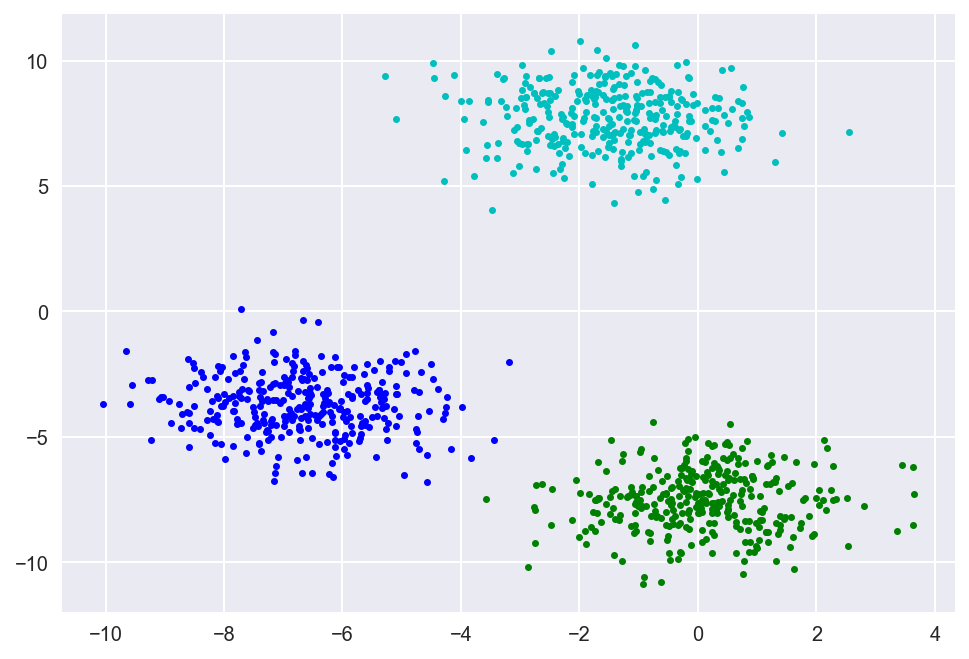

In [4]:
def plot_data(X, y, centers=None):
    def plot_points(points, symbol=None):
        plt.plot(points[:, 0], points[:, 1], symbol)
    def plot_line(points, symbol):
        plt.plot(points[:, 0], points[:, 1], symbol, linewidth=1)
    
    X_cls0, X_cls1, X_cls2 = [X[y == i] for i in range(3)]
    
    plot_points(X_cls0, 'b.')
    plot_points(X_cls1, 'c.')
    plot_points(X_cls2, 'g.')
    
    if centers is not None:
        plot_points(centers, 'ro')
    plt.show()

plot_data(X, y)

In [5]:
def random_initial_centers(X, n_clusters=3):
    return X[np.random.choice(X.shape[0], n_clusters, replace=False)]

def assign_to_clusters(X, centers):
    distances = cdist(X, centers)
    return np.argmin(distances, axis=1)

def update_centers(X, labels, n_clusters=3):
    new_centers = np.zeros((n_clusters, X.shape[1]))
    for k in range(n_clusters):
        new_centers[k, :] = np.mean(X[labels == k], axis=0)
    return new_centers

def train(X, n_clusters=3, n_iterations=1000):
    n_examples, n_features = X.shape
    centers = random_initial_centers(X, n_clusters=n_clusters)
    labels = np.zeros(n_examples)
    
    for i in range(n_iterations):
        labels = assign_to_clusters(X, centers)
        centers = update_centers(X, labels, n_clusters=n_clusters)
    
    return {
        'labels': labels,
        'centers': centers
    }

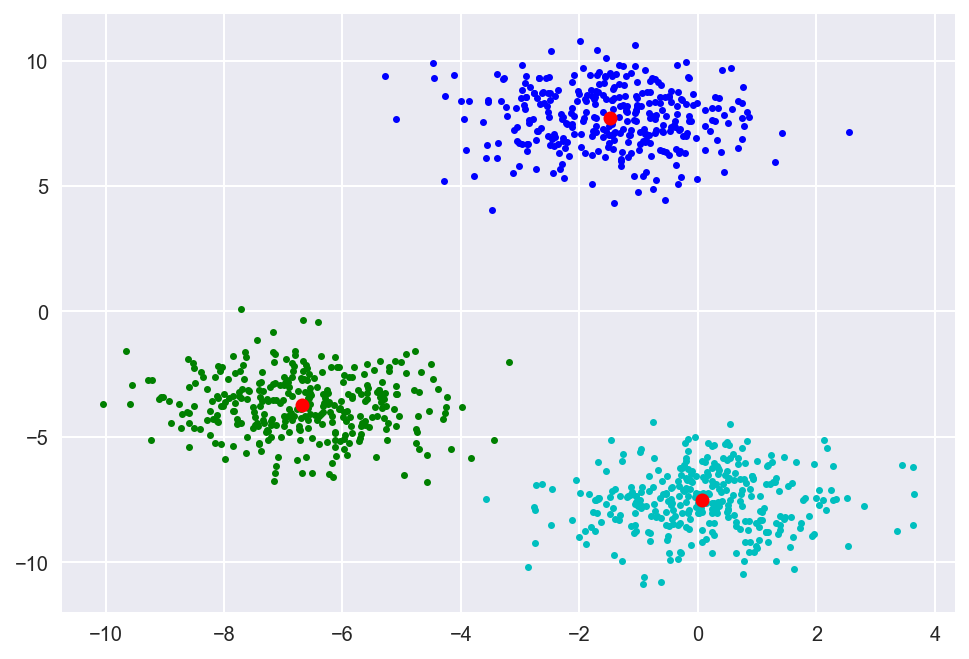

In [6]:
result = train(X, n_iterations=1000)
centers, labels = result['centers'], result['labels']
plot_data(X, labels, centers)

### MNIST using k-means

In [15]:
digits, _ = datasets.load_digits(return_X_y=True)
digits_labels = train(digits, n_clusters=10)['labels']

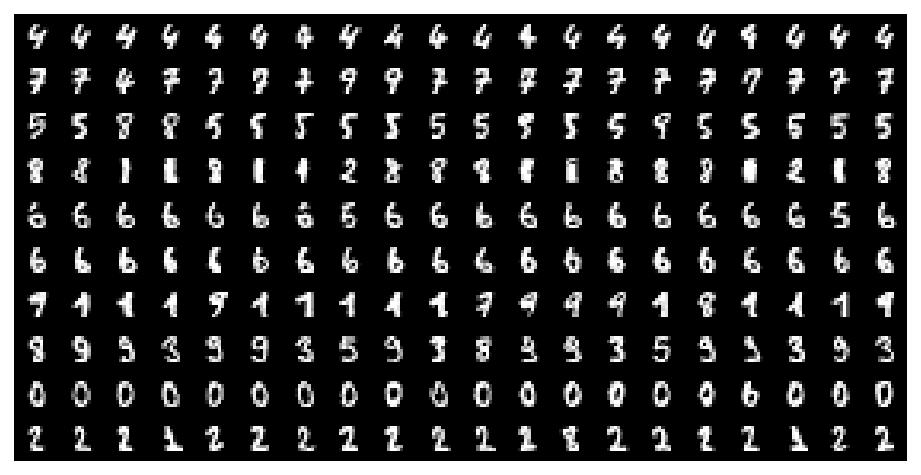

In [16]:
def plot_digits(digits, labels, n_clusters=10): 
    def wrap_in_border(img, width=3):
        vline = lambda: np.zeros((img.shape[0], width))
        hline = lambda: np.zeros((width, img.shape[0] + 2 * width))
        new_img = np.hstack([vline(), -img, vline()])
        return np.vstack([hline(), new_img, hline()])
    
    rows = []
    for k in range(n_clusters):
        digits_same_cluster = digits[labels == k]
        np.random.shuffle(digits_same_cluster)
        row = [wrap_in_border(digits_same_cluster[i, :].reshape((8, 8))) for i in range(20)]
        rows.append(np.hstack(row))
    img = np.vstack(rows)
    
    plt.imshow(img)
    plt.xticks([]); plt.yticks([])
    plt.show()
    
plot_digits(digits, digits_labels)